# ЛАБОРАТОРНАЯ РАБОТА №6. «ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ. ЗАДАЧА КЛАСТЕРИЗАЦИИ»

ЗАДАНИЕ №1 
1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гиперпараметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

ЗАДАНИЕ №2.
1. На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.
2. Произвести визуализацию построенных моделей.
3. Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.


ЗАДАНИЕ №3*.
Реализовать алгоритма DBSCAN и с его помощью провести кластеризацию всех датасетов Лаб_работы №6.

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, completeness_score, davies_bouldin_score
from sklearn.metrics.cluster import rand_score
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn_som.som import SOM
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

#### Метрики и другие вспомогательные функции

In [3]:
def metrics(data, data_y, model):
    try:
      y_pred = model.labels_
    except:
      y_pred = model.predict(data)
    print('Внешние метрики:',
          f'rand_score: {rand_score(y_pred, data_y)}',
          f'adjusted_rand_score: {completeness_score(y_pred, data_y)}',
          'Внутренние метрики:',
          f'silhouette_score: {silhouette_score(data, y_pred)}',
          f'davies_bouldin_score: {davies_bouldin_score(data, y_pred)}', sep=f'\n')

- Silhouette_score - оценивает плотность и разделенность кластеров, близкое к +1 значение указывает на четко определенные кластеры.
- Davies_bouldin_score - оценивает среднее расстояние между кластерами и их размеры, чем меньше значение, тем лучше.
- Adjusted_rand_score - оценивает сходство между предсказанными кластерами и истинными классами, близкое к 1 значение указывает на хорошее сходство.
- Rand_score - Показывает схожесть между фактическими и предсказанными кластеризациями, где 1 - идеальное соответствие. Учитывает истинно положительные и истинно отрицательные значения.

In [4]:
def k_param(data, num_clusters_range):
    scores = []

    for iteration in range(1, num_clusters_range + 1):
        model = KMeans(n_clusters=iteration, n_init='auto').fit(data)
        scores.append(model.inertia_)

    return scores

In [5]:
def input_vis(model1, model2, model3, nameModel):
    plt.figure(figsize=(18, 6))
    for index, (data, model) in enumerate([(data_1, model1), (data_2,model2), (data_3, model3)]):
        try:
          y_pred = model.labels_
        except:
          y_pred = model.predict(data)
            
        plt.subplot(1, 3, index+1)
        plt.scatter(data[:, 0], data[:, 1], c = y_pred)
        #plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
        plt.title(f"{nameModel} {index+1}")
    plt.show()

## Задание №1

### 1.Сгенерировать 3 датасета (make_classification или make_blobs)

In [133]:
data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=150)

In [134]:
data_2, data_y_2 = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=66)

In [135]:
data_3, data_y_3 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=44)

### 2.Провести визуализацию

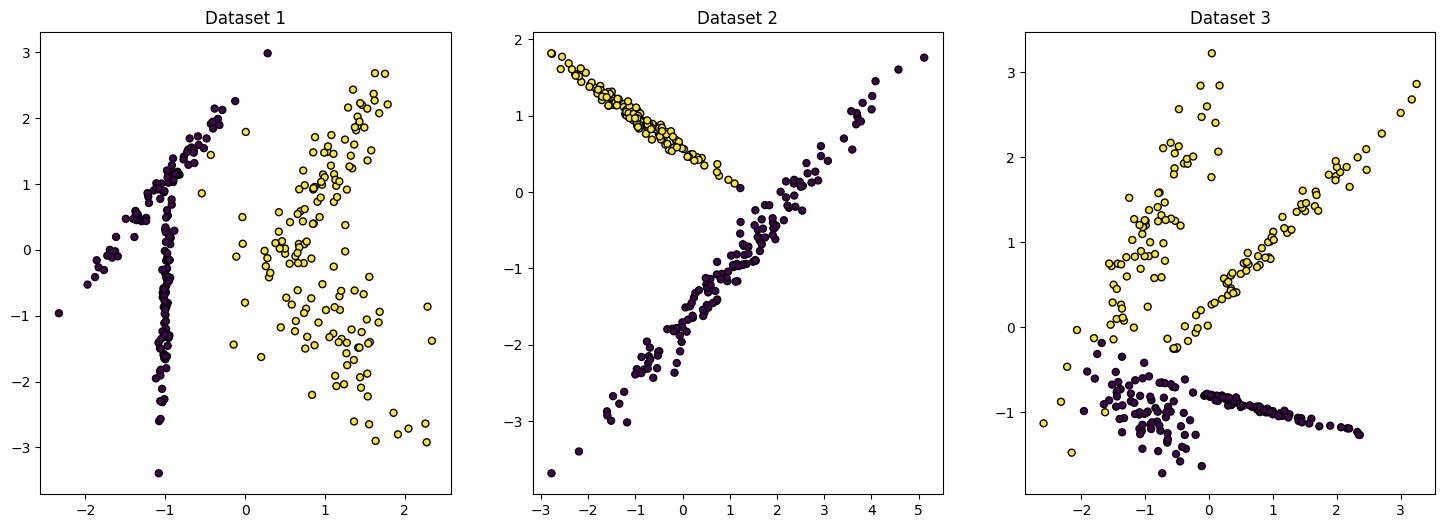

In [136]:
plt.figure(figsize=(18, 6))
for index, (data, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], marker="o", c=y, s=25, edgecolor="k")
    plt.title(f"Dataset {index+1}")
plt.show()

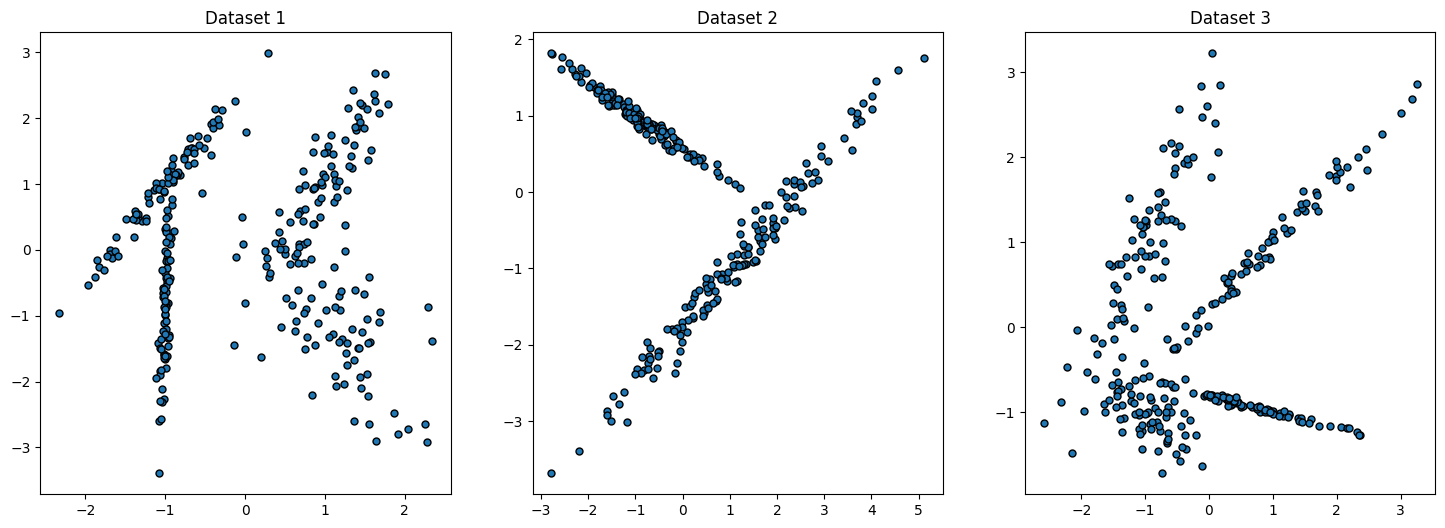

In [137]:
plt.figure(figsize=(18, 6))
for index, (data, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], marker="o", s=25, edgecolor="k")
    plt.title(f"Dataset {index+1}")
plt.show()

### 3.Провести кластеризацию (все методы)

Также в 3 пункте, были выполнены 4 и 6 пункты

#### KMeans

##### Метод локтя

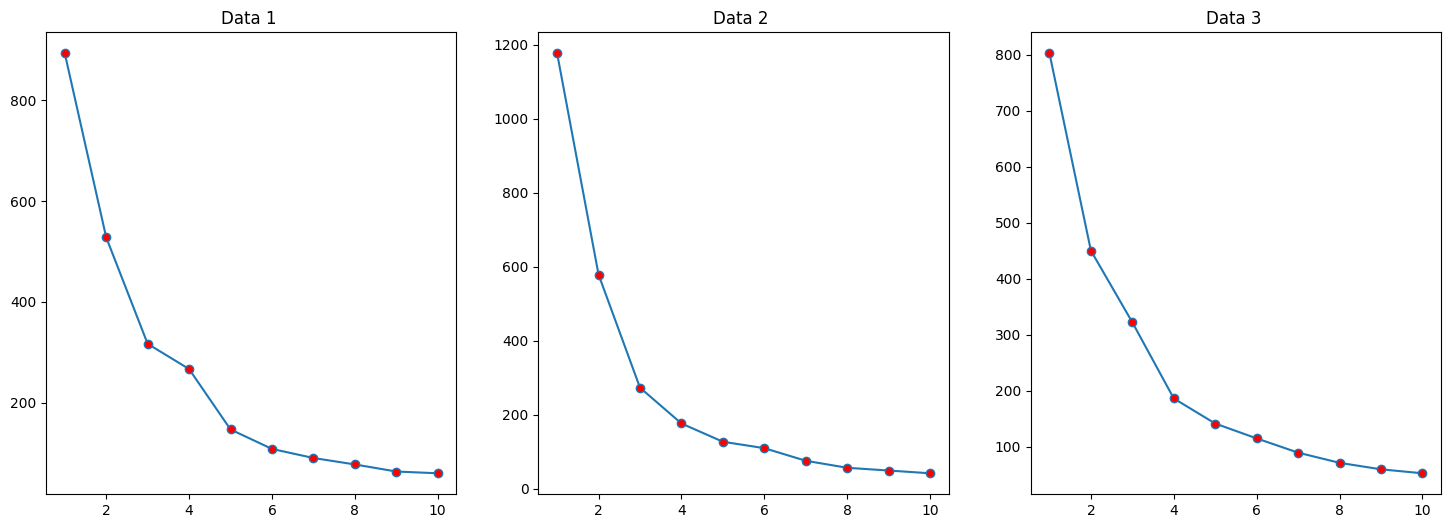

In [138]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([data_1, data_2, data_3]):
    results_iter = k_param(data, 10)
    plt.subplot(1, 3, index+1)
    plt.plot(range(1, iterations+1), results_iter, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("Data {} ".format(index+1))
plt.show()

##### Kmeans

In [139]:
kmeans_dataset_1 = KMeans(n_clusters=4, n_init="auto").fit(data_1)
kmeans_dataset_2 = KMeans(n_clusters=3, n_init="auto").fit(data_2)
kmeans_dataset_3 = KMeans(n_clusters=4, n_init="auto").fit(data_3)

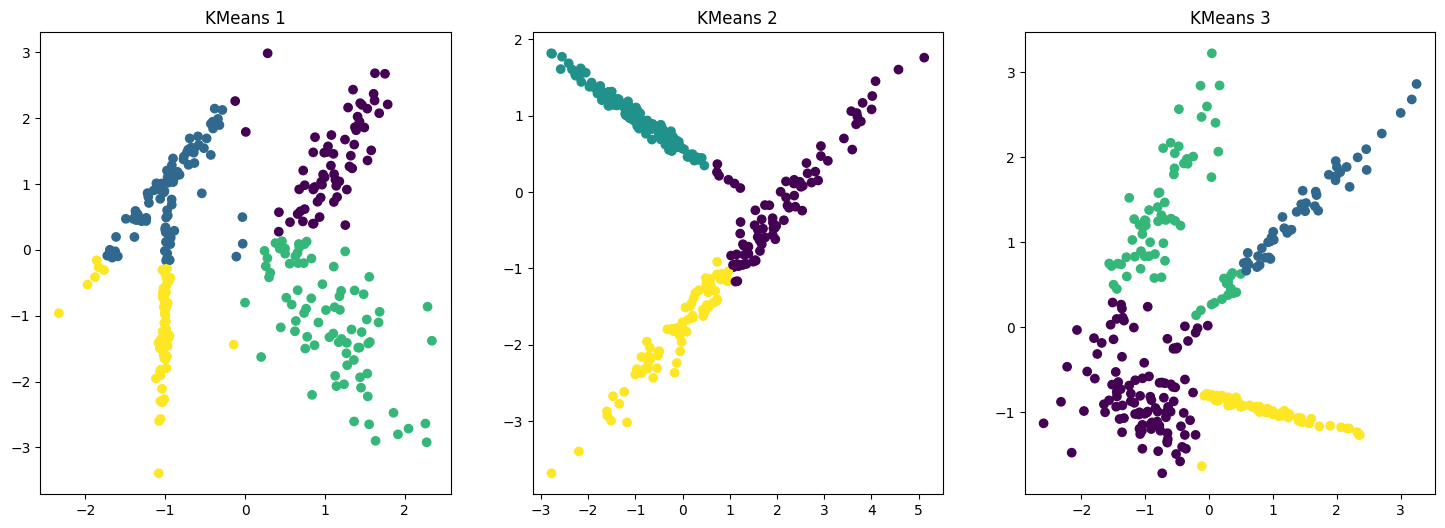

In [140]:
input_vis(kmeans_dataset_1, kmeans_dataset_2, kmeans_dataset_3, "KMeans")

In [141]:
metrics(data_1, data_y_1, kmeans_dataset_1)

Внешние метрики:
rand_score: 0.728561872909699
adjusted_rand_score: 0.8388367965343073
Внутренние метрики:
silhouette_score: 0.48487044175420074
davies_bouldin_score: 0.6616473822280563


In [142]:
metrics(data_2, data_y_2, kmeans_dataset_2)

Внешние метрики:
rand_score: 0.8419397993311036
adjusted_rand_score: 0.8798447890432528
Внутренние метрики:
silhouette_score: 0.6101785325807579
davies_bouldin_score: 0.589794433298117


In [143]:
metrics(data_3, data_y_3, kmeans_dataset_3)

Внешние метрики:
rand_score: 0.6726644370122631
adjusted_rand_score: 0.7093308086815998
Внутренние метрики:
silhouette_score: 0.47693423804436613
davies_bouldin_score: 0.7205099982155666


#### AffinityPropagation

Подбор гипепараметров

In [144]:
preference = range(-150,0)

In [145]:
for index, (X, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    best_score = -1
    best_params = {}

    for pref in preference:
        AP = AffinityPropagation(preference=pref).fit(X)
        rand = rand_score(y, AP.labels_)

        if rand > best_score:
            best_score = rand
            best_params = {"preference": pref}

    print(f'{index+1} : {best_score} : {best_params}')

C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packa

1 : 0.7372798216276477 : {'preference': -86}


C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packa

2 : 0.8445484949832776 : {'preference': -126}


C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\vlszg\AppData\Local\Packa

3 : 0.7689855072463768 : {'preference': -136}


C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


1 : 0.7388851727982163 : {'preference': -142}\
2 : 0.8440802675585284 : {'preference': -46}\
3 : 0.7689855072463768 : {'preference': -136}

In [146]:
clustering_1 = AffinityPropagation(preference=-142).fit(data_1)
clustering_2 = AffinityPropagation(preference=-46).fit(data_2)
clustering_3 = AffinityPropagation(preference=-136).fit(data_3)

C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


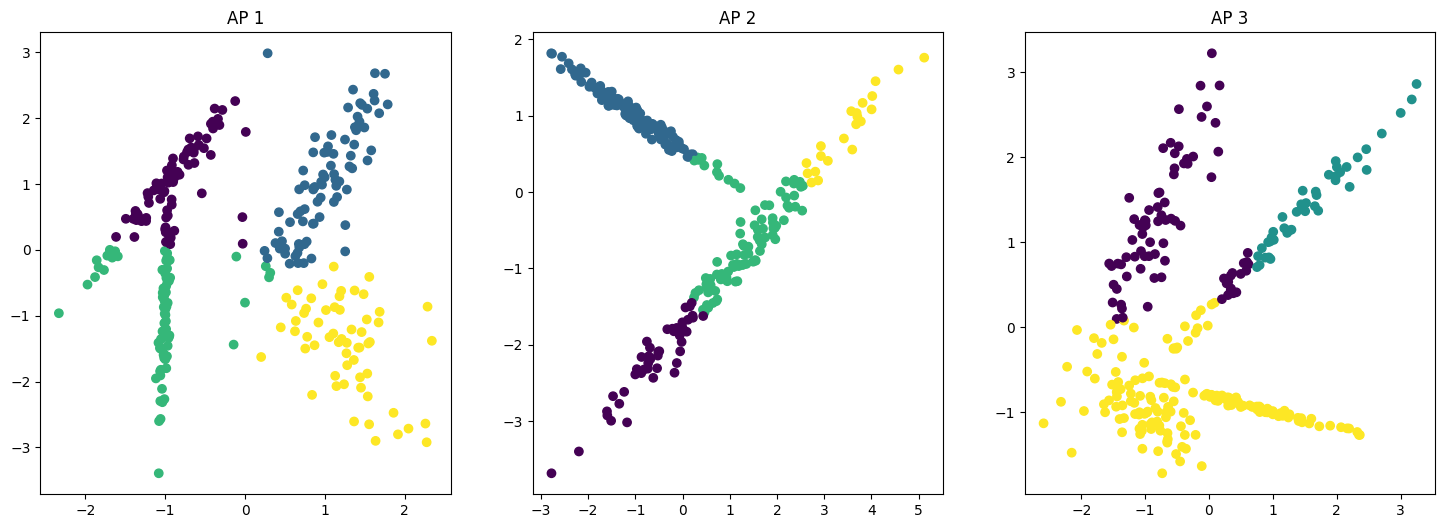

In [147]:
input_vis(clustering_1, clustering_2, clustering_3, "AP")

In [148]:
metrics(data_1, data_y_1, clustering_1)

Внешние метрики:
rand_score: 0.7130657748049053
adjusted_rand_score: 0.7818077970783796
Внутренние метрики:
silhouette_score: 0.4852748888197007
davies_bouldin_score: 0.6793386934453455


In [149]:
metrics(data_2, data_y_2, clustering_2)

Внешние метрики:
rand_score: 0.7970345596432553
adjusted_rand_score: 0.8182638879885548
Внутренние метрики:
silhouette_score: 0.5886276623499251
davies_bouldin_score: 0.5413967431396929


In [150]:
metrics(data_3, data_y_3, clustering_3)

Внешние метрики:
rand_score: 0.7689855072463768
adjusted_rand_score: 0.6548575458269753
Внутренние метрики:
silhouette_score: 0.4190993545203873
davies_bouldin_score: 0.8466601949571965


#### DBSCAN

Подбор гиперпараметров

In [151]:
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]

In [152]:
for index, (X, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    best_score = -1
    best_params = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            rand = rand_score(y, dbscan.labels_)

            if rand > best_score:
                best_score = rand
                best_params = {"eps": eps, 'min_samples': min_samples}

    print(f'{index+1} : {best_score} : {best_params}')

1 : 0.9574804905239688 : {'eps': 0.5, 'min_samples': 3}
2 : 0.9467335562987736 : {'eps': 0.5, 'min_samples': 10}
3 : 0.6252396878483835 : {'eps': 0.5, 'min_samples': 15}


In [153]:
dbscan_1 = DBSCAN(eps=0.5, min_samples=3).fit(data_1)
dbscan_2 = DBSCAN(eps=0.5, min_samples=10).fit(data_2)
dbscan_3 = DBSCAN(eps=0.5, min_samples=15).fit(data_3)

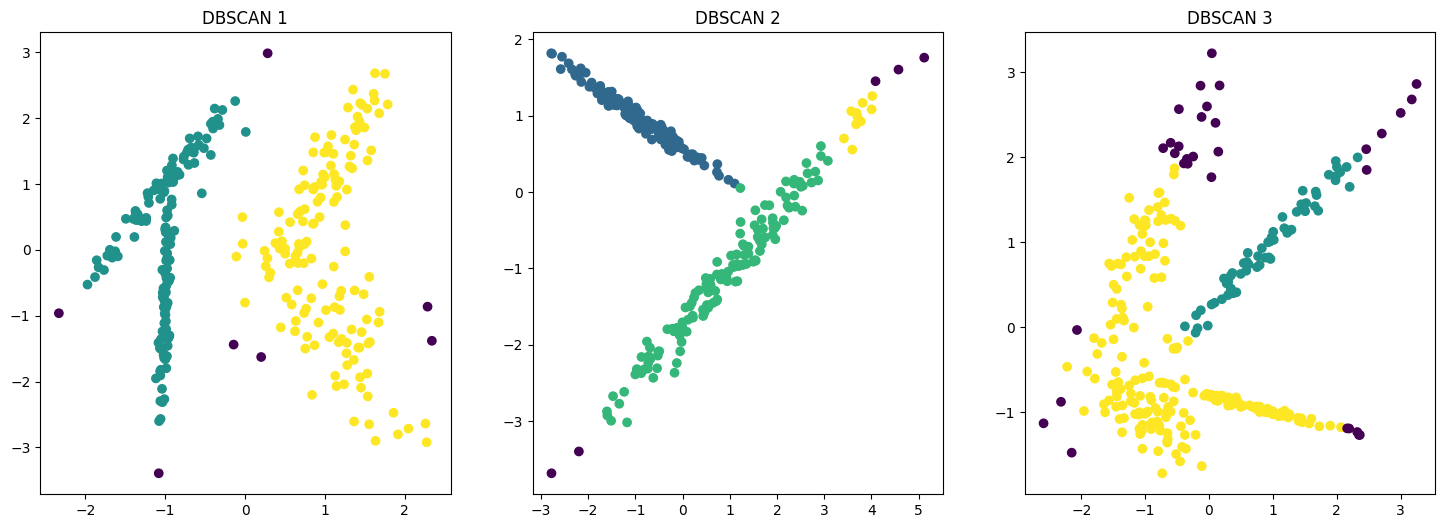

In [154]:
input_vis(dbscan_1, dbscan_2, dbscan_3, "DBSCAN")

In [155]:
metrics(data_1, data_y_1, dbscan_1)
print('----------------------------------------------')
metrics(data_2, data_y_2, dbscan_2)
print('----------------------------------------------')
metrics(data_3, data_y_3, dbscan_3)

Внешние метрики:
rand_score: 0.9574804905239688
adjusted_rand_score: 0.906291072221624
Внутренние метрики:
silhouette_score: 0.34093209307970407
davies_bouldin_score: 2.45068827101555
----------------------------------------------
Внешние метрики:
rand_score: 0.9467335562987736
adjusted_rand_score: 0.9711395940586703
Внутренние метрики:
silhouette_score: 0.5148085563927932
davies_bouldin_score: 3.2454808349645363
----------------------------------------------
Внешние метрики:
rand_score: 0.6252396878483835
adjusted_rand_score: 0.3314476335886962
Внутренние метрики:
silhouette_score: 0.3023088930943452
davies_bouldin_score: 3.6319396334373457


#### GaussianMixture

In [156]:
n_components = range(1,15)

In [157]:
for index, (X, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    best_score = np.inf
    best_params = {}

    for n_component in n_components:
        GM = GaussianMixture(n_components=n_component).fit(X)
        aic = GM.aic(X)

        if aic < best_score:
            best_score = aic
            best_params = {"n_components": n_component}

    print(f'{index+1} : {best_score} : {best_params}')

1 : 1161.1201898512006 : {'n_components': 4}
2 : 796.7596792753623 : {'n_components': 2}
3 : 1039.8980507780363 : {'n_components': 4}


In [158]:
GM_1 = GaussianMixture(n_components=4).fit(data_1)
GM_2 = GaussianMixture(n_components=2).fit(data_2)
GM_3 = GaussianMixture(n_components=4).fit(data_3)

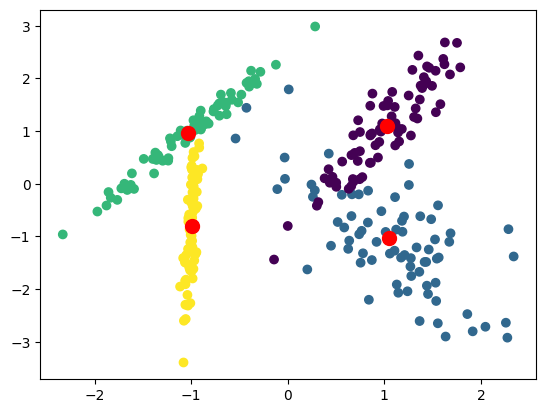

In [159]:
plt.scatter(data_1[:,0], data_1[:,1], c=GM_1.predict(data_1))
plt.scatter(GM_1.means_[:,0], GM_1.means_[:,1], s=100, c='red')

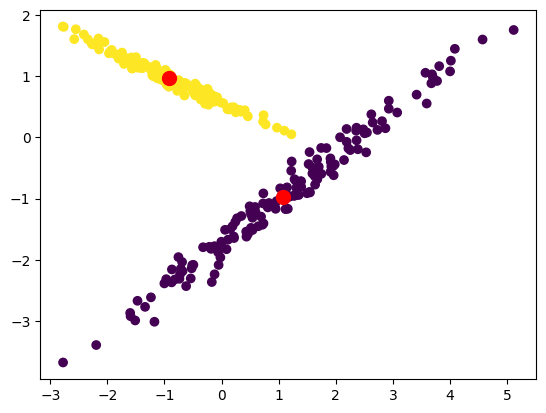

In [160]:
plt.scatter(data_2[:,0], data_2[:,1], c=GM_2.predict(data_2))
plt.scatter(GM_2.means_[:,0], GM_2.means_[:,1], s=100, c='red')

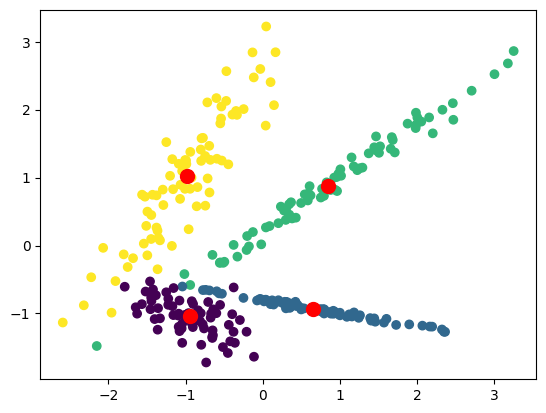

In [161]:
plt.scatter(data_3[:,0], data_3[:,1], c=GM_3.predict(data_3))
plt.scatter(GM_3.means_[:,0], GM_3.means_[:,1], s=100, c='red')

In [162]:
metrics(data_1, data_y_1, GM_1)
print('----------------------------------------------')
metrics(data_2, data_y_2, GM_2)
print('----------------------------------------------')
metrics(data_3, data_y_3, GM_3)

Внешние метрики:
rand_score: 0.7491861761426979
adjusted_rand_score: 1.0000000000000002
Внутренние метрики:
silhouette_score: 0.3874112260292546
davies_bouldin_score: 0.8047173499308635
----------------------------------------------
Внешние метрики:
rand_score: 0.9867112597547381
adjusted_rand_score: 0.9489144304106263
Внутренние метрики:
silhouette_score: 0.5379047421204582
davies_bouldin_score: 0.7561281037690707
----------------------------------------------
Внешние метрики:
rand_score: 0.7240133779264214
adjusted_rand_score: 0.8407712823188619
Внутренние метрики:
silhouette_score: 0.3815859979406649
davies_bouldin_score: 0.906828796687543


#### Иерархическая кластеризация

In [163]:
linkage_1 = linkage(data_1, method='ward')
linkage_2 = linkage(data_2, method='ward')
linkage_3 = linkage(data_2, method='ward')

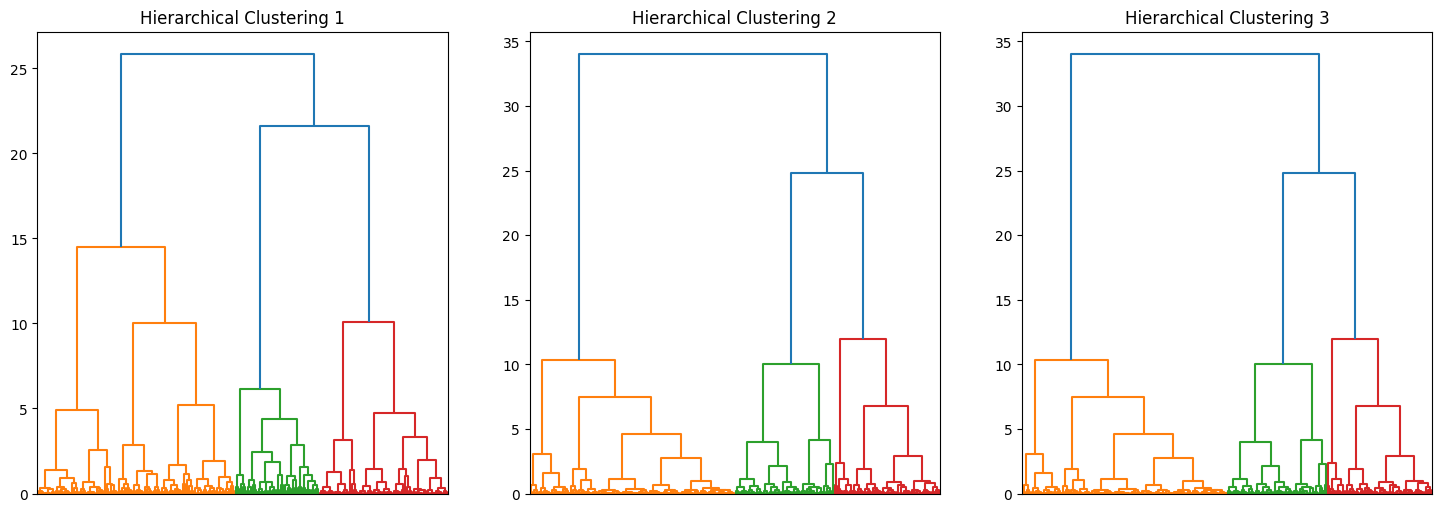

In [164]:
plt.figure(figsize=(18, 6))

for index, data in enumerate([linkage_1, linkage_2, linkage_3]):
    plt.subplot(1, 3, index+1)
    dendrogram(data)
    plt.title("Hierarchical Clustering {}".format(index+1))
    plt.gca().set_xticks([])
plt.show()

- 1:4
- 2:3
- 3:3

In [165]:
hc_1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit(data_1)

C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [166]:
hc_2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit(data_2)

C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [167]:
hc_3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit(data_3)

C:\Users\vlszg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [168]:
metrics(data_1, data_y_1, hc_1)
print('----------------------------------------------')
metrics(data_2, data_y_2, hc_2)
print('----------------------------------------------')
metrics(data_3, data_y_3, hc_3)

Внешние метрики:
rand_score: 0.7520847268673355
adjusted_rand_score: 0.9429694107501351
Внутренние метрики:
silhouette_score: 0.45608772040762974
davies_bouldin_score: 0.6919461280790484
----------------------------------------------
Внешние метрики:
rand_score: 0.8613823857302119
adjusted_rand_score: 0.9489144304106262
Внутренние метрики:
silhouette_score: 0.5958978114589855
davies_bouldin_score: 0.5897905085181904
----------------------------------------------
Внешние метрики:
rand_score: 0.8121962095875139
adjusted_rand_score: 0.8183407150393024
Внутренние метрики:
silhouette_score: 0.4049803120810964
davies_bouldin_score: 0.8011389734864492


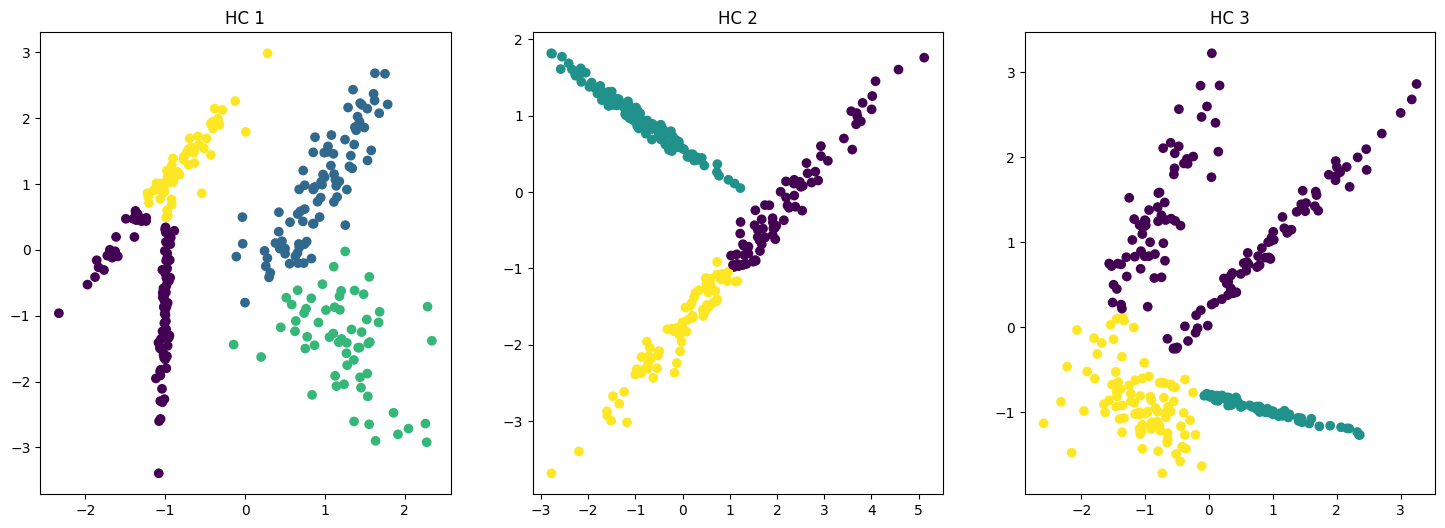

In [169]:
input_vis(hc_1, hc_2, hc_3, "HC")

#### Карты кохена

In [170]:
model = SOM(m = 11, n=1, dim=2)
model.fit(data_2)

In [171]:
n_iterations = 9
dict_rand = dict()

for index, (X, y) in enumerate([(data_1, data_y_1), (data_2, data_y_2), (data_3, data_y_3)]):
    scores = []
    best_rand_score = -np.inf

    for iter in range(2, n_iterations+1):
        model = SOM(m = iter, n=1, dim=2)
        model.fit(X)
        rand_score_value = rand_score(y, model.predict(X))
        scores.append(rand_score_value)
        if rand_score_value > best_rand_score:
            best_n_clusters = iter

    dict_rand[f'Model {index+1}'] = scores

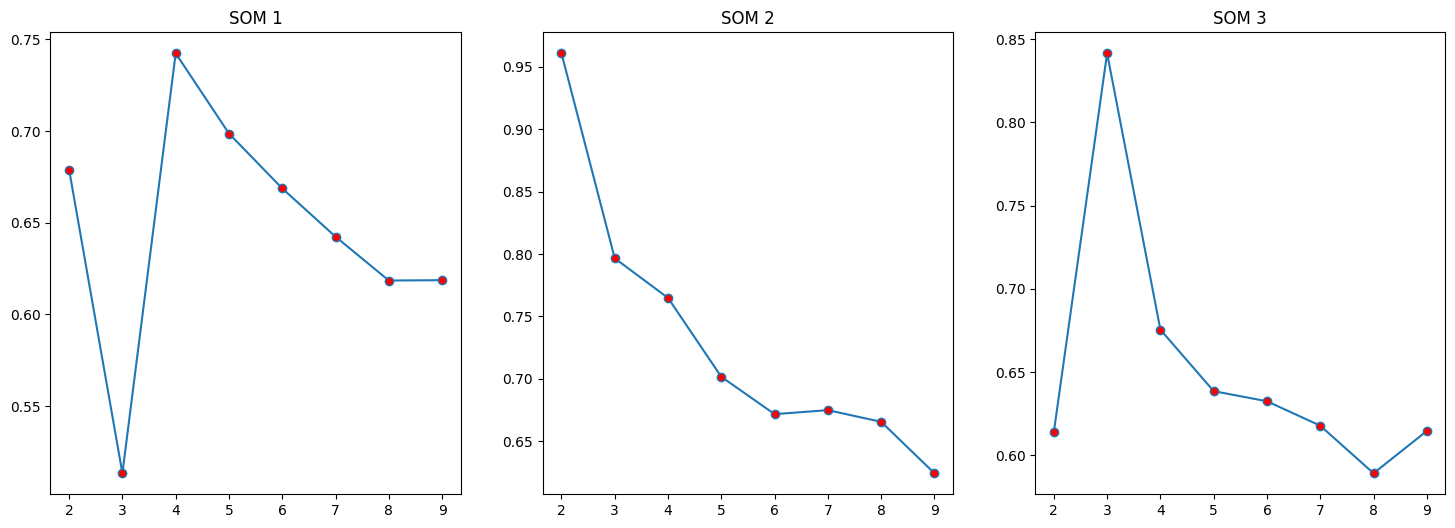

In [172]:
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_rand['Model 1'], dict_rand['Model 2'], dict_rand['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(2, 10), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("SOM {}".format(index+1))
plt.show()

In [173]:
SOM_1 = SOM(m=4, n=1, dim=2)
SOM_1.fit(data_1)

In [174]:
SOM_2 = SOM(m=5, n=1, dim=2)
SOM_2.fit(data_2)

In [175]:
SOM_3 = SOM(m=5, n=1, dim=2)
SOM_3.fit(data_3)

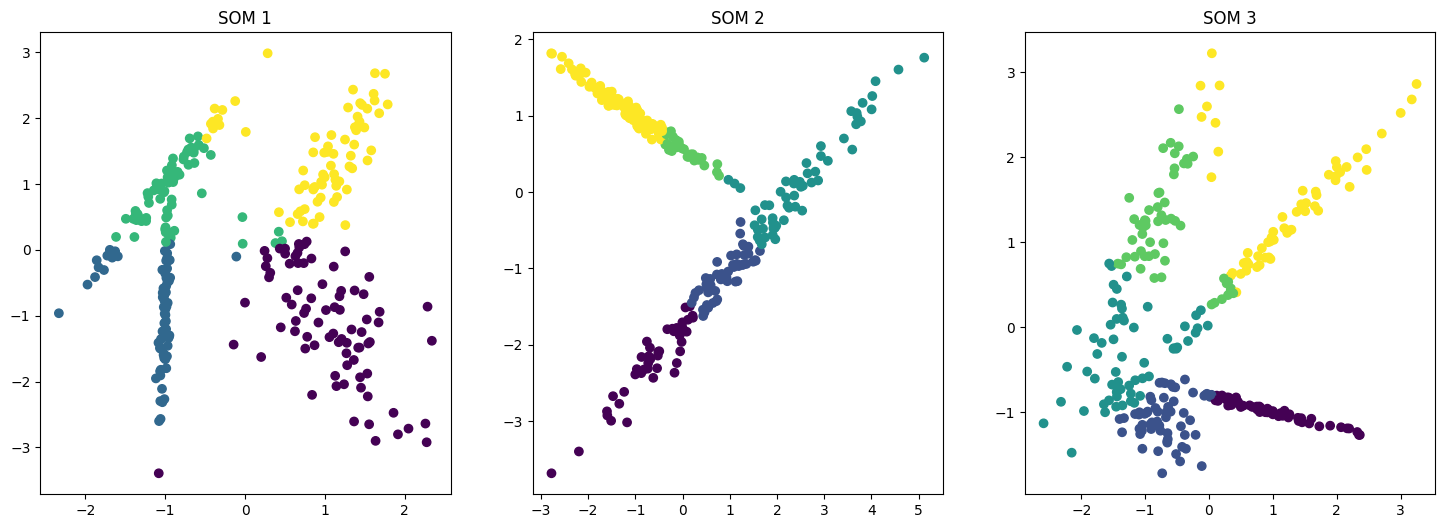

In [176]:
input_vis(SOM_1, SOM_2, SOM_3, "SOM")

In [177]:
metrics(data_1, data_y_1, SOM_1)
print('----------------------------------------------')
metrics(data_2, data_y_2, SOM_2)
print('----------------------------------------------')
metrics(data_3, data_y_3, SOM_3)

Внешние метрики:
rand_score: 0.69438127090301
adjusted_rand_score: 0.6977618930349488
Внутренние метрики:
silhouette_score: 0.45711095309428373
davies_bouldin_score: 0.7039128101680389
----------------------------------------------
Внешние метрики:
rand_score: 0.7387513935340022
adjusted_rand_score: 0.9306350266694995
Внутренние метрики:
silhouette_score: 0.4521533859559931
davies_bouldin_score: 0.6232751507474311
----------------------------------------------
Внешние метрики:
rand_score: 0.6598439241917503
adjusted_rand_score: 0.8025724451255617
Внутренние метрики:
silhouette_score: 0.3774291402621705
davies_bouldin_score: 0.9110024450295156


### 5.Самостоятельно реализовать KMeans. Проверить его работу на датасетах.

1. Мы создаем класс KMeans, который имеет методы fit для обучения модели и predict для предсказания кластеров.
2. В методе fit инициализируем центроиды случайными точками из данных и затем итеративно обновляем их путем пересчета средних значений точек в каждом кластере.
3. В методе predict предсказываем кластеры на основе расстояний до центроидов.

In [178]:
class my_KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(range(len(X)), size=self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            clusters = [[] for _ in range(self.n_clusters)]
            for x in X:
                distances = [np.linalg.norm(x - centroid) for centroid in self.centroids]
                cluster_index = np.argmin(distances)
                clusters[cluster_index].append(x)
            
            new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids
        
    def predict(self, X):
        distances = np.array([[np.linalg.norm(x - centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

In [179]:
my_kmeans_1 = my_KMeans(n_clusters=4)
my_kmeans_2 = my_KMeans(n_clusters=3)
my_kmeans_3 = my_KMeans(n_clusters=4)

In [180]:
my_kmeans_1.fit(data_1)
my_kmeans_2.fit(data_2)
my_kmeans_3.fit(data_3)

In [181]:
metrics(data_1, data_y_1, my_kmeans_1)
print('---------------------------------------------')
metrics(data_2, data_y_2, my_kmeans_2)
print('---------------------------------------------')
metrics(data_3, data_y_3, my_kmeans_3)

Внешние метрики:
rand_score: 0.6901003344481605
adjusted_rand_score: 0.6857353450179359
Внутренние метрики:
silhouette_score: 0.3780006433142722
davies_bouldin_score: 0.8690148216120379
---------------------------------------------
Внешние метрики:
rand_score: 0.8419397993311036
adjusted_rand_score: 0.8798447890432528
Внутренние метрики:
silhouette_score: 0.6101785325807579
davies_bouldin_score: 0.5897944332981169
---------------------------------------------
Внешние метрики:
rand_score: 0.6800891861761427
adjusted_rand_score: 0.7160203735965279
Внутренние метрики:
silhouette_score: 0.4732787015644211
davies_bouldin_score: 0.7157682309031393


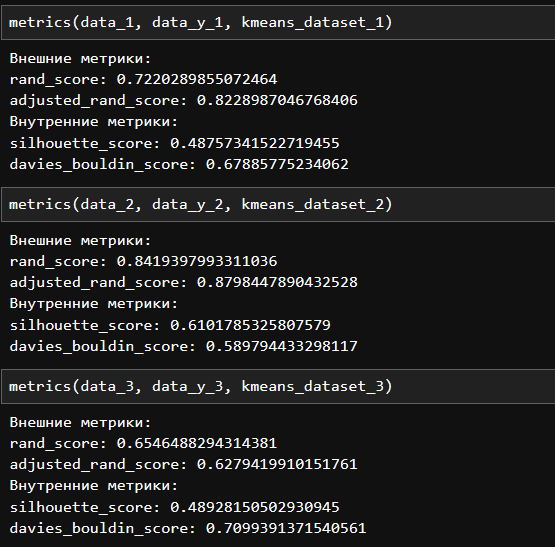

матрики отличаются незначительно

## Задание №2

In [6]:
data_bomb = pd.read_csv('filteredNotes\Lab4.csv')

In [7]:
X = data_bomb.drop(['bomb_planted', 'Unnamed: 0'], axis=1).values
y = data_bomb['bomb_planted']

### Kmeans

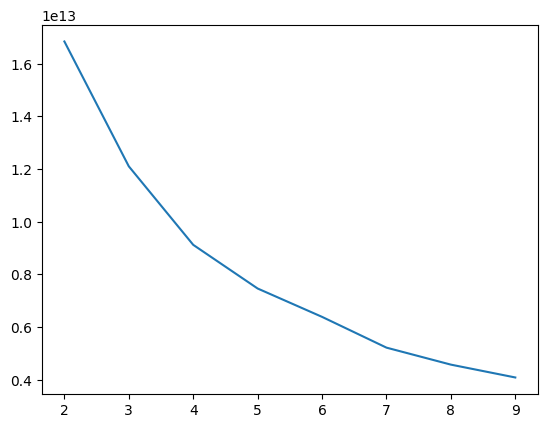

In [8]:
inertias = []

for i in range(2, 10):
    m = KMeans(n_clusters=i, n_init="auto").fit(X)
    inertias.append(m.inertia_)

plt.plot(range(2, 10), inertias)

In [9]:
kmeans_data_bomb = KMeans(n_clusters = 4, n_init='auto')
kmeans_data_bomb.fit(X)

KMeans(n_clusters=4, n_init='auto')

In [14]:
import pickle

with open("C:\MLforGIt\ML_RGR\Models\KMEANS.pickle", "wb") as f:
    pickle.dump(kmeans_data_bomb, f)

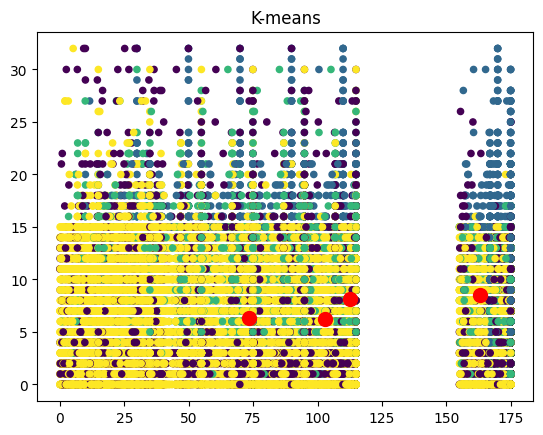

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_data_bomb.labels_, cmap='viridis', s=20)
plt.scatter(kmeans_data_bomb.cluster_centers_[:, 0], kmeans_data_bomb.cluster_centers_[:, 1], c='red', marker='o', s=100)
plt.title('K-means')
plt.show()

In [12]:
metrics(X, y, kmeans_data_bomb)

NameError: name 'metrics' is not defined

### DBSCAN

In [15]:
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]

In [16]:
scaler = StandardScaler()
X_for_dbscan = scaler.fit_transform(X)

In [17]:
#best_score = -1
#best_params = {}

#for eps in eps_values:
    #for min_samples in min_samples_values:
        #dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_for_dbscan)
        #rand = rand_score(y, dbscan.labels_)

        #if rand > best_score:
            #best_score = rand
            #best_params = {"eps": eps, "min_samples": min_samples}

#print(f"{best_score} : {best_params}")

In [18]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1.5, min_samples=3)

In [19]:
import pickle

with open("C:/MLforGIt/ML_RGR/Models/DBSCAN.pickle", "wb") as f:
    pickle.dump(dbscan, f)

In [26]:
metrics(
    X,
    y,
    dbscan
)

Внешние метрики:
rand_score: 0.7777397102886968
adjusted_rand_score: 0.003189783646055429
Внутренние метрики:
silhouette_score: -0.5138510010105442
davies_bouldin_score: 1.0290926904760094


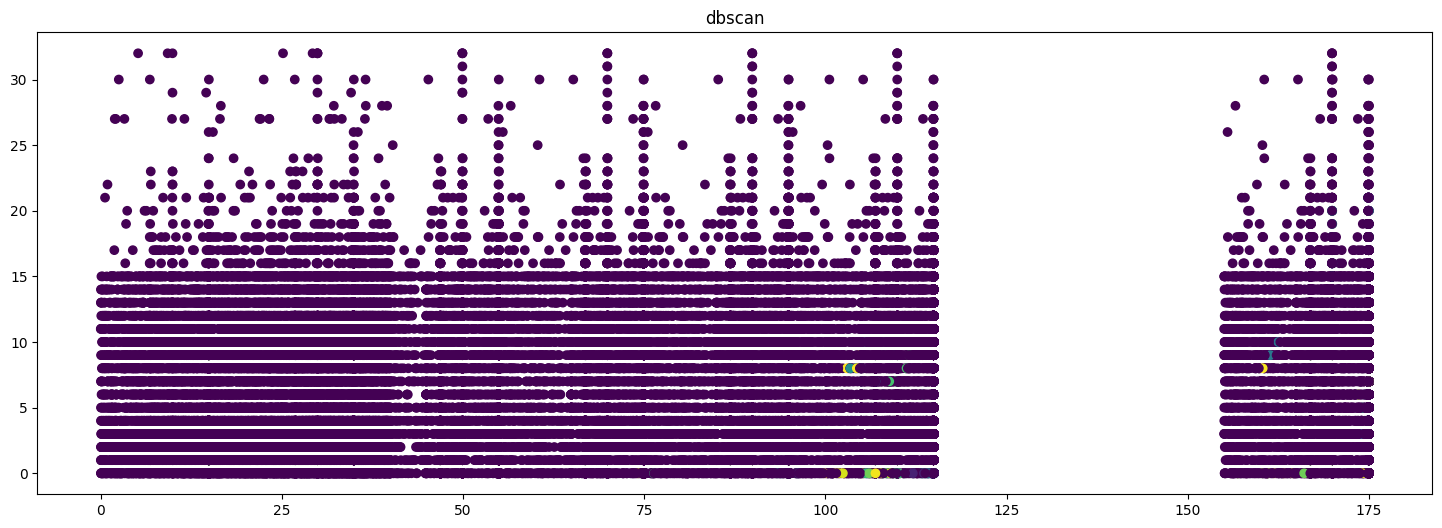

In [33]:
plt.figure(figsize=(18, 6))

try:
    y_pred = dbscan.labels_
except:
    y_pred = dbscan.predict(data)
            
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
plt.title(f"dbscan")
plt.show()

### Иерархическая кластеризация

In [21]:
X_small = X[:10000, :]
y_small = y[:10000]

In [22]:
#linkage = linkage(X_small.values, method='ward')

In [23]:
plt.figure(figsize=(7, 6))
dendrogram(linkage)
plt.title("Hierarchical Clustering")
plt.gca().set_xticks([])
plt.show()

TypeError: Linkage matrix 'Z' must contain doubles.

<Figure size 700x600 with 0 Axes>

In [24]:
ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward").fit(
    X_small
)

c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
import pickle

with open("C:/MLforGIt/ML_RGR/Models/AgglomerativeClustering.pickle", "wb") as f:
    pickle.dump(ac, f)

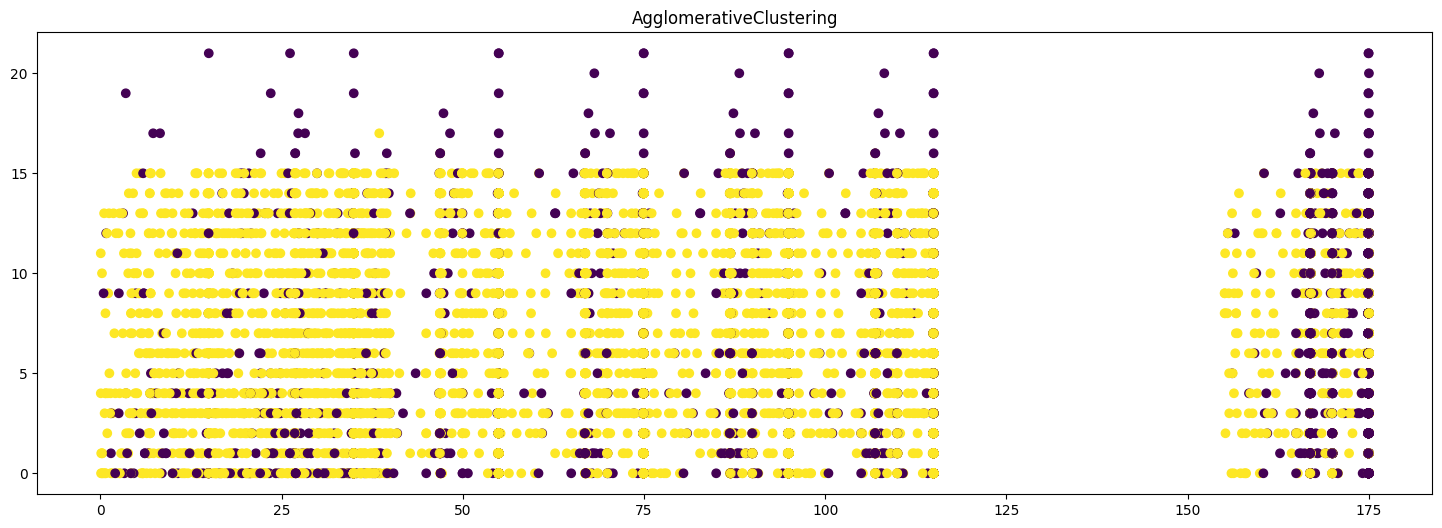

In [58]:
plt.figure(figsize=(18, 6))

try:
    y_pred = ac.labels_
except:
    y_pred = ac.predict(data)
            
plt.scatter(X_small[:, 0], X_small[:, 1], c = y_pred)
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
plt.title(f"AgglomerativeClustering")
plt.show()

In [ ]:
metrics(X_small, y_small, ac)

Внешние метрики:
rand_score: 0.5135968796879687
adjusted_rand_score: 0.03209665523615859
Внутренние метрики:
silhouette_score: 0.47665312045853314
davies_bouldin_score: 0.9473540095752812


### Вывод

Наилучшим образом по метрике rand_score отработала модель DBSCAN, набрав 0.7777397102886968, но silhouette_score: -0.5138510010105442 показал худший результат

AgglomerativeClustering выдала метрику rand_score: 0.5135968796879687, хуже, чем DBSCAN, но намного опередил в метрике silhouette_score: 0.47665312045853314